In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

In [2]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy]===0.12.3;
!{python} -m pip install MySQL-python;
!{python} -m  pip install MySQL-python-connector;

# as well as install a language model:
!{python} -m spacy download en_core_web_md
!{python} -m spacy link en_core_web_md en --force;
!pip install mysql-connector-python




     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 133kB 7.2MB/s 
     |████████████████████████████████| 665kB 8.7MB/s 
     |████████████████████████████████| 4.9MB 16.8MB/s 
     |████████████████████████████████| 49.1MB 64kB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 430kB 38.9MB/s 
     |████████████████████████████████| 307kB 38.7MB/s 
     |████████████████████████████████| 5.2MB 42.7MB/s 
     |████████████████████████████████| 122kB 47.4MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 3.1MB 35.6MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 204kB 39.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |██

In [3]:
import rasa_nlu
import rasa_core
import spacy

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))
print("Loading spaCy language model...")
print(spacy.load("en")("Hello world!"))

rasa_nlu: 0.12.3 rasa_core: 0.9.6
Loading spaCy language model...
Hello world!


In [4]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz
!{python} -m pip install pygraphviz;

Selecting previously unselected package libxdot4.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Preparing to unpack .../libgvc6-plugins-gtk_2.40.1-2_amd64.deb ...
Unpacking libgvc6-plugins-gtk (2.40.1-2) ...
Selecting previously unselected package libgraphviz-dev.
Preparing to unpack .../libgraphviz-dev_2.40.1-2_amd64.deb ...
Unpacking libgraphviz-dev (2.40.1-2) ...
Setting up libxdot4 (2.40.1-2) ...
Setting up libgvc6-plugins-gtk (2.40.1-2) ...
Setting up libgraphviz-dev (2.40.1-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

/bin/bash: breq: command not found
     |████████████████████████████████| 122kB 2.8MB/s 
  Created wheel for p

In [5]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello
- good morning
- good evening
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon
- start
## intent:affirm
- great
- OK
- okay
- thank you
- thanks
- yes, thanks
- cheers
- thanks a lot
- thank you very much

## intent: health_about
- Please tell me about [health department](HealthInsurance),
- Please tell me the [health insurance](HealthInsurance) Plans for family
- What is [health insurance](HealthInsurance)
- For how many year's [health insurance](HealthInsurance) is covered
- Please tell me about [abc health insurance](HealthInsurance)
- Please tell me the [abc health insurance](HealthInsurance) Plans for family
- What is [abc health insurance](HealthInsurance)
- For how many year's [abc health insurance](HealthInsurance) is covered
- How to renew my [health insurance](HealthInsurance)
- What is [health insurance](HealthInsurance)
- I would like to know more about [health insurance](HealthInsurance)
- Please tell something about [health insurance](HealthInsurance)
- What is meant by [health insurance](HealthInsurance)
- Explain about [health insurance](HealthInsurance)
- Give me the details of [health insurance](HealthInsurance)
- Tell me about [health insurance](HealthInsurance)
- Please tell about [health insurance](HealthInsurance)
- How to renew my [abc health insurance](HealthInsurance)
- What is [abc health insurance](HealthInsurance)
- I would like to know more about [abc health insurance](HealthInsurance)
- Please tell something about [abc health insurance](HealthInsurance)
- What is meant by [abc health insurance](HealthInsurance)
- Explain about [abc health insurance](HealthInsurance)
- Give me the details of [abc health insurance](HealthInsurance)
- Tell me about [abc health insurance](HealthInsurance)
- Please tell about [abc health insurance](HealthInsurance)

## intent: vehicle_about
- How to renew my [abc vehicle insurance](VehicleInsurance)
- What is [abc vehicle insurance](VehicleInsurance)
- I would like to know more about [abc vehicle insurance](VehicleInsurance)
- Please tell something about [abc vehicle insurance](VehicleInsurance)
- What is meant by [abc vehicle insurance](VehicleInsurance)
- Explain about [abc vehicle insurance](VehicleInsurance)
- Give me the details of [abc vehicle insurance](VehicleInsurance)
- Tell me about [abc vehicle insurance](VehicleInsurance)
- Please tell about [abc vehicle insurance](VehicleInsurance)
- How to renew my [vehicle insurance](VehicleInsurance)
- What is [vehicle insurance](VehicleInsurance)
- I would like to know more about [vehicle insurance](VehicleInsurance)
- Please tell something about [vehicle insurance](VehicleInsurance)
- What is meant by [vehicle insurance](VehicleInsurance)
- Explain about [vehicle insurance](VehicleInsurance)
- Give me the details of [vehicle insurance](VehicleInsurance)
- Tell me about [vehicle insurance](VehicleInsurance)
- Please tell about [vehicle insurance](VehicleInsurance)


## intent: vehicle_benefits
- What are the [vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- Are there any [vehicle insurance](VehicleInsurance) benefits?
- Tell me about the [benefits](Benefits) of  [vehicle insurance](VehicleInsurance)?
- What do you know about [vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [vehicle insurance](VehicleInsurance)?
- What are the [benefits](Benefits) over other [vehicle insurance](VehicleInsurance) companies?
- What are the [abc vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- Are there any [abc vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- Tell me about the benifits of  [abc vehicle insurance](VehicleInsurance)?
- What do you know about [abc vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [abc vehicle insurance](VehicleInsurance)?
- What are the [benefits](Benefits) over other [abc vehicle insurance](VehicleInsurance) companies?
- What are the [vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- Are there any [vehicle insurance](VehicleInsurance) tax benefits?
- Tell me about the [tax benefits](Benefits) of  [vehicle insurance](VehicleInsurance)?
- What do you know about [vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- What are the [tax benefits](Benefits) of taking ABC [vehicle insurance](VehicleInsurance)?
- What are the [tax benefits](Benefits) over other [vehicle insurance](VehicleInsurance) companies?
- What are the [abc vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- Are there any [abc vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- Tell me about the benifits of  [abc vehicle insurance](VehicleInsurance)?
- What do you know about [abc vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- What are the [tax benefits](Benefits) of taking ABC [abc vehicle insurance](VehicleInsurance)?
- What are the [tax benefits](Benefits) over other [abc vehicle insurance](VehicleInsurance) companies?
- What are the [vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- Are there any [vehicle insurance](VehicleInsurance) regular benefits benefits?
- Tell me about the [regular benefits benefits](Benefits) of  [vehicle insurance](VehicleInsurance)?
- What do you know about [vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- What are the [regular benefits benefits](Benefits) of taking ABC [vehicle insurance](VehicleInsurance)?
- What are the [regular benefits benefits](Benefits) over other [vehicle insurance](VehicleInsurance) companies?
- What are the [abc vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- Are there any [abc vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- Tell me about the benifits of  [abc vehicle insurance](VehicleInsurance)?
- What do you know about [abc vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- What are the [regular benefits benefits](Benefits) of taking ABC [abc vehicle insurance](VehicleInsurance)?
- What are the [regular benefits benefits](Benefits) over other [abc vehicle insurance](VehicleInsurance) companies?
- What are the vehicle insurance [benefits](Benefits)?
- Are there any vehicle insurance benefits?
- Tell me about the [benefits](Benefits) of  vehicle insurance?
- What do you know about vehicle insurance [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC vehicle insurance?
- What are the [benefits](Benefits) over other vehicle insurance companies?
- What are the abc vehicle insurance [benefits](Benefits)?
- Are there any abc vehicle insurance [benefits](Benefits)?
- Tell me about the benifits of  abc vehicle insurance?
- What do you know about abc vehicle insurance [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC abc vehicle insurance?
- What are the [benefits](Benefits) over other abc vehicle insurance companies?
- What are the vehicle insurance [tax benefits](Benefits)?
- Are there any vehicle insurance tax benefits?
- Tell me about the [tax benefits](Benefits) of  vehicle insurance?
- What do you know about vehicle insurance [tax benefits](Benefits)?
- What are the [tax benefits](Benefits) of taking ABC vehicle insurance?
- What are the [tax benefits](Benefits) over other vehicle insurance companies?
- What are the abc vehicle insurance [tax benefits](Benefits)?
- Are there any abc vehicle insurance [tax benefits](Benefits)?
- Tell me about the benifits of  abc vehicle insurance?
- What do you know about abc vehicle insurance [tax benefits](Benefits)?
- What are the [tax benefits](Benefits) of taking ABC abc vehicle insurance?
- What are the [tax benefits](Benefits) over other abc vehicle insurance companies?
- What are the vehicle insurance [regular benefits benefits](Benefits)?
- Are there any vehicle insurance regular benefits benefits?
- Tell me about the [regular benefits benefits](Benefits) of  vehicle insurance?
- What do you know about vehicle insurance [regular benefits benefits](Benefits)?
- What are the [regular benefits benefits](Benefits) of taking ABC vehicle insurance?
- What are the [regular benefits benefits](Benefits) over other vehicle insurance companies?
- What are the abc vehicle insurance [regular benefits benefits](Benefits)?
- Are there any abc vehicle insurance [regular benefits benefits](Benefits)?
- Tell me about the benifits of  abc vehicle insurance?
- What do you know about abc vehicle insurance [regular benefits benefits](Benefits)?
- What are the [regular benefits benefits](Benefits) of taking ABC abc vehicle insurance?
- What are the [regular benefits benefits](Benefits) over other abc vehicle insurance companies?



## intent: health_benefits
- What are the [health insurance](HealthInsurance) [benefits](Benefits)?
- Are there any [health insurance](HealthInsurance) [benefits](Benefits)?
- Tell me about the [benefits](Benefits) of  [health insurance](HealthInsurance)?
- What do you know about [health insurance](HealthInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [health insurance](HealthInsurance)?
- What are the [benefits](Benefits) over other [health insurance](HealthInsurance) companies?
- What are the [abc health insurance](HealthInsurance) [benefits](Benefits)?
- Are there any [abc health insurance](HealthInsurance) [benefits](Benefits)?
- Tell me about the [benefits](Benefits) of  [abc health insurance](HealthInsurance)?
- What do you know about [abc health insurance](HealthInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [abc health insurance](HealthInsurance)?
- What are the [benefits](Benefits) over other [abc health insurance](HealthInsurance) companies?
- What are the [health insurance](HealthInsurance) [regular benefits](Benefits)?
- Are there any [health insurance](HealthInsurance) [regular benefits](Benefits)?
- Tell me about the [regular benefits](Benefits) of  [health insurance](HealthInsurance)?
- What do you know about [health insurance](HealthInsurance) [regular benefits](Benefits)?
- What are the [regular benefits](Benefits) of taking ABC [health insurance](HealthInsurance)?
- What are the [regular benefits](Benefits) over other [health insurance](HealthInsurance) companies?
- What are the [abc health insurance](HealthInsurance) [regular benefits](Benefits)?
- Are there any [abc health insurance](HealthInsurance) [regular benefits](Benefits)?
- Tell me about the [regular benefits](Benefits) of  [abc health insurance](HealthInsurance)?
- What do you know about [abc health insurance](HealthInsurance) [regular benefits](Benefits)?
- What are the [regular benefits](Benefits) of taking ABC [abc health insurance](HealthInsurance)?
- What are the [regular benefits](Benefits) over other [abc health insurance](HealthInsurance) companies?
- What are the [health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Are there any [health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Tell me about the [complementary benefits](Benefits) of  [health insurance](HealthInsurance)?
- What do you know about [health insurance](HealthInsurance) [complementary benefits](Benefits)?
- What are the [complementary benefits](Benefits) of taking ABC [health insurance](HealthInsurance)?
- What are the [complementary benefits](Benefits) over other [health insurance](HealthInsurance) companies?
- What are the [abc health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Are there any [abc health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Tell me about the [complementary benefits](Benefits) of  [abc health insurance](HealthInsurance)?
- What do you know about [abc health insurance](HealthInsurance) [complementary benefits](Benefits)?
- What are the [complementary benefits](Benefits) of taking ABC [abc health insurance](HealthInsurance)?
- What are the [complementary benefits](Benefits) over other [abc health insurance](HealthInsurance) companies?


## intent: health_timeperiod
- What is the [validity](TimePeriod) of [abc health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [abc health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [abc health insurance](HealthInsurance) valid?
- What is the [validity](TimePeriod) of [health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [health insurance](HealthInsurance) valid?
- What is the [validity](TimePeriod) of [health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [health insurance](HealthInsurance) valid?
- What is the [validity](TimePeriod) of [abc health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [abc health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [abc health insurance](HealthInsurance) valid?


## intent: vehicle_timeperiod
- What is the [validity](TimePeriod) of [vehicle insurance](VehicleInsurance)?
- What is the [duration](TimePeriod) of [vehicle insurance](VehicleInsurance)?
- How [long](TimePeriod)  is the [vehicle insurance](VehicleInsurance) valid?
- What is the [validity](TimePeriod) of [abc vehicle insurance](VehicleInsurance)?
- What is the [duration](TimePeriod) of [abc vehicle insurance](VehicleInsurance)?
- How [long](TimePeriod)  is the [abc vehicle insurance](VehicleInsurance) valid?


## intent: vehicle_insuranceclaim
- What are the [documents](Documents) required for [vehicle insurance](VehicleInsurance)?
- What are the [documents](Documents) that i need to apply for [vehicle insurance](VehicleInsurance)?
- What all [documents](Documents) do i need for [vehicle insurance](VehicleInsurance)?
- WHAT [factors](Documents) DO I NEED TO CONSIDER BEFORE APPLYING FOR [vehicle insurance](VehicleInsurance)?
- What are the [documents](Documents) required for [abc vehicle insurance](VehicleInsurance)?
- What are the [documents](Documents) that i need to apply for [abc vehicle insurance](VehicleInsurance)?
- What all [documents](Documents) do i need for [abc vehicle insurance](VehicleInsurance)?
- WHAT [factors](Documents) DO I NEED TO CONSIDER BEFORE APPLYING FOR [abc vehicle insurance](VehicleInsurance)?

## intent: health_insuranceclaim
- What are the [documents](Documents) required for [health insurance](HealthInsurance)?
- What are the [documents](Documents) that i need to apply for [health insurance](HealthInsurance)?
- What all [documents](Documents) do i need for [health insurance](HealthInsurance)?
- WHAT [factors](Documents) DO I NEED TO CONSIDER BEFORE APPLYING FOR [health insurance](HealthInsurance)?
- What are the [documents](Documents) required for [abc health insurance](HealthInsurance)?
- What are the [documents](Documents) that i need to apply for [abc health insurance](HealthInsurance)?
- What all [documents](Documents) do i need for [abc health insurance](HealthInsurance)?
- WHAT [factors](Documents) DO I NEED TO CONSIDER BEFORE APPLYING FOR [abc health insurance](HealthInsurance)?


## intent: health_linking
- How to [link](Link) my aadhar?
- How to [link](Link) my pan card?
- How to [link](Link) my GST?
- Is it possible to [link](Link) my aadhar with my [health insurance](HealthInsurance)?
- Is it possible to [link](Link) my GST with my [health insurance](HealthInsurance)?
- Is it possible to [link](Link) my pan card with my [health insurance](HealthInsurance)?
- Is it necessasary to [link](Link) my aadhar with my [health insurance](HealthInsurance)?
- Is it necessasary to [link](Link) my GST with my [health insurance](HealthInsurance)?
- Is it necessasary to [link](Link) my pan card with my [health insurance](HealthInsurance)?
- How can I [link](Link) my aadhar with my [health insurance](HealthInsurance)?
- How can I [link](Link) my GST with my [health insurance](HealthInsurance)?
- How can I [link](Link) my pan card with my [health insurance](HealthInsurance)?
- How do I [link](Link) my aadhar?
- How do I [link](Link) my GST?
- How do I [link](Link) my pan card?




## intent: vehicle_linking
- How to [link](Link) my aadhar?
- How to [link](Link) my pan card?
- How to [link](Link) my GST?
- Is it possible to [link](Link) my aadhar with my [vehicle insurance](VehicleInsurance)?
- Is it possible to [link](Link) my GST with my [vehicle insurance](VehicleInsurance)?
- Is it possible to [link](Link) my pan card with my [vehicle insurance](VehicleInsurance)?
- Is it necessasary to [link](Link) my aadhar with my [vehicle insurance](VehicleInsurance)?
- Is it necessasary to [link](Link) my GST with my [vehicle insurance](VehicleInsurance)?
- Is it necessasary to [link](Link) my pan card with my [vehicle insurance](VehicleInsurance)?
- How can I [link](Link) my aadhar with my [vehicle insurance](VehicleInsurance)?
- How can I [link](Link) my GST with my [vehicle insurance](VehicleInsurance)?
- How can I [link](Link) my pan card with my [vehicle insurance](VehicleInsurance)?
- How do I [link](Link) my aadhar?
- How do I [link](Link) my GST?
- How do I [link](Link) my pan card?


## intent: generalinfo
- I forgot my [password](Credentials)
- How do I reset my [password](Credentials)?
- I forgot my [username](Credentials)
- I am not able to [login](Credentials) in
- How to update [password](Credentials)?
- Retrieve [username](Credentials)
- Retrieve [password](Credentials)
- How to update [username](Credentials)?
- How to change [username](Credentials)?
- How to change [password](Credentials)?
- Failed to remember [username](Credentials)?
- Failed to remember [password](Credentials)?

## intent: vehicle_sum_assured
- How much [amount](InsuranceSum) is guaranteed for [vehicle insurance](VehicleInsurance)?
- How much [money](InsuranceSum) is guaranteed for [vehicle insurance](VehicleInsurance)?
- What is the minimum [amount](InsuranceSum) of [money](InsuranceSum) assured for [vehicle insurance](VehicleInsurance)?
- How much [insurance sum](InsuranceSum) is guaranteed for [vehicle insurance](VehicleInsurance)?
- How much [insurance sum](InsuranceSum) is guaranteed for [vehicle insurance](VehicleInsurance)?
- What is the minimum [amount](InsuranceSum) of [insurance sum](InsuranceSum) assured for [vehicle insurance](VehicleInsurance)?


## intent: health_sum_assured
- How much [amount](InsuranceSum) is guaranteed for [health insurance](HealthInsurance)?
- How much [money](InsuranceSum) is guaranteed for [health insurance](HealthInsurance)?
- What is the minimum [amount](InsuranceSum) of [money](InsuranceSum) assured for [health insurance](HealthInsurance)?
- How much [insurance sum](InsuranceSum) is guaranteed for [health insurance](HealthInsurance)?
- How much [insurance sum](InsuranceSum) is guaranteed for [health insurance](HealthInsurance)?
- What is the minimum [amount](InsuranceSum) of [insurance sum](InsuranceSum) assured for [health insurance](HealthInsurance)?


## intent: health_sublimit
- What is [health insurance](HealthInsurance) [sub limit](SubLimit)?
- What is the [sub limit](SubLimit) of [health insurance](HealthInsurance)?
- What is [abc health insurance](HealthInsurance) [sub limit](SubLimit)?
- What is the [sub limit](SubLimit) of [abc health insurance](HealthInsurance)?

## intent: vehicle_sublimit
- What is [vehicle insurance](VehicleInsurance) [sub limit](SubLimit)?
- What is the [sub limit](SubLimit) of [vehicle insurance](VehicleInsurance)?
- What is [abc vehicle insurance](VehicleInsurance) [sub limit](SubLimit)?
- What is the [sub limit](SubLimit) of [abc vehicle insurance](VehicleInsurance)?



#intent: insurance_renewal
- When do I [renew](Renew) my [policy](Policy)?
- What are the procedures that is required to [renew](Renew) my [policy](Policy)?
- What are the documents required to [renew](Renew) my [policy](Policy)?
- What are the documents needed for [renewing](Renew) my [policy](Policy)?
- How to [renew](Renew) my [policy](Policy)?
- How can I [renew](Renew) my [policy](Policy)?
- When should I [renew](Renew) my [policy](Policy)?
- Can I [renew](Renew) my insurance [policy](Policy)?
- When do I [renew](Renew) my [isurance policy](Policy)?
- What are the procedures that is required to [renew](Renew) my [isurance policy]?
- What are the documents required to [renew](Renew) my [isurance policy]?
- What are the documents needed for [renewing](Renew) my [isurance policy]?
- How to [renew](Renew) my [isurance policy]?
- How can I [renew](Renew) my [isurance policy]?
- When should I [renew](Renew) my [isurance policy]?
- Can I [renew](Renew) my insurance [isurance policy]?


#intent: vehicle_coverage
- What is the basic [vehicle insurance](VehicleInsurance) [coverage](Coverage)?
- What are the different [vehicle insurance](VehicleInsurance) [coverage](Coverage)?
- What is the [coverage](Coverage) for [vehicle insurance](VehicleInsurance)?
- What is the basic [abc vehicle insurance](VehicleInsurance) [coverage](Coverage)?
- What are the different [abc vehicle insurance](VehicleInsurance) [coverage](Coverage)?
- What is the [coverage](Coverage) for [abc vehicle insurance](VehicleInsurance)?
- What is the basic [vehicle insurance](VehicleInsurance) [insurance coverage](Coverage)?
- What are the different [vehicle insurance](VehicleInsurance) [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for [vehicle insurance](VehicleInsurance)?
- What is the basic [abc vehicle insurance](VehicleInsurance) [insurance coverage](Coverage)?
- What are the different [abc vehicle insurance](VehicleInsurance) [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for [abc vehicle insurance](VehicleInsurance)?
- What is the basic vehicle insurance [coverage](Coverage)?
- What are the different vehicle insurance [coverage](Coverage)?
- What is the [coverage](Coverage) for vehicle insurance?
- What is the basic abc vehicle insurance [coverage](Coverage)?
- What are the different abc vehicle insurance [coverage](Coverage)?
- What is the [coverage](Coverage) for abc vehicle insurance?
- What is the basic vehicle insurance [insurance coverage](Coverage)?
- What are the different vehicle insurance [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for vehicle insurance?
- What is the basic abc vehicle insurance [insurance coverage](Coverage)?
- What are the different abc vehicle insurance [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for abc vehicle insurance?

#intent: health_coverage
- What is the basic [health insurance](HealthInsurance) [coverage](Coverage)?
- What are the different [health insurance](HealthInsurance) [coverage](Coverage)?
- What is the [coverage](Coverage) for [health insurance](HealthInsurance)?
- What is the basic [abc health insurance](HealthInsurance) [coverage](Coverage)?
- What are the different [abc health insurance](HealthInsurance) [coverage](Coverage)?
- What is the [coverage](Coverage) for [abc health insurance](HealthInsurance)?
- What is the basic [health insurance](HealthInsurance) [insurance coverage](Coverage)?
- What are the different [health insurance](HealthInsurance) [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for [health insurance](HealthInsurance)?
- What is the basic [abc health insurance](HealthInsurance) [insurance coverage](Coverage)?
- What are the different [abc health insurance](HealthInsurance) [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for [abc health insurance](HealthInsurance)?
- What is the basic health insurance [coverage](Coverage)?
- What are the different health insurance [coverage](Coverage)?
- What is the [coverage](Coverage) for health insurance?
- What is the basic abc health insurance [coverage](Coverage)?
- What are the different abc health insurance [coverage](Coverage)?
- What is the [coverage](Coverage) for abc health insurance?
- What is the basic health insurance [insurance coverage](Coverage)?
- What are the different [health insurance] [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for health insurance?
- What is the basic abc health insurance [insurance coverage](Coverage)?
- What are the different abc health insurance [insurance coverage](Coverage)?
- What is the [insurance coverage](Coverage) for abc health insurance?


"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


In [6]:
config = """
language: "en"
policies:
  - name: "KerasPolicy"
    featurizer:
    - name: MaxHistoryTrackerFeaturizer
      max_history: 5
      state_featurizer:
        - name: BinarySingleStateFeaturizer
  - name: "MemoizationPolicy"
    max_history: 5
pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                     # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms


""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


In [7]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 334 (17 distinct intents)
	- Found intents: 'generalinfo', 'vehicle_sum_assured', 'health_benefits', 'vehicle_benefits', 'health_about', 'vehicle_insuranceclaim', 'health_insuranceclaim', 'vehicle_sublimit', 'vehicle_about', 'vehicle_linking', 'health_timeperiod', 'affirm', 'vehicle_timeperiod', 'health_sum_assured', 'health_linking', 'greet', 'health_sublimit'
	- entity examples: 306 (12 distinct entities)
	- found entities: 'Renew', 'TimePeriod', 'VehicleInsurance', 'Policy', 'InsuranceSum', 'Coverage', 'Documents', 'SubLimit', 'Link', 'Credentials', 'Benefits', 'HealthInsurance'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training 

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.0s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_synonyms
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/content/models/nlu/default/current'


In [8]:
pprint(interpreter.parse("What is tax benefit"))

{
  "intent": {
    "name": "vehicle_benefits",
    "confidence": 0.3957642570085448
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "vehicle_benefits",
      "confidence": 0.3957642570085448
    },
    {
      "name": "health_sum_assured",
      "confidence": 0.12508482096769732
    },
    {
      "name": "health_benefits",
      "confidence": 0.0878773801377184
    },
    {
      "name": "health_timeperiod",
      "confidence": 0.08314382894764928
    },
    {
      "name": "health_about",
      "confidence": 0.05985984262617745
    },
    {
      "name": "vehicle_sum_assured",
      "confidence": 0.059175201455026506
    },
    {
      "name": "vehicle_sublimit",
      "confidence": 0.029256346574137126
    },
    {
      "name": "vehicle_timeperiod",
      "confidence": 0.029094004713611232
    },
    {
      "name": "health_sublimit",
      "confidence": 0.021920790004477178
    },
    {
      "name": "health_insuranceclaim",
      "confidence": 0.0210057263094072

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 334 (17 distinct intents)
	- Found intents: 'generalinfo', 'vehicle_sum_assured', 'health_benefits', 'vehicle_benefits', 'health_about', 'vehicle_insuranceclaim', 'health_insuranceclaim', 'vehicle_sublimit', 'vehicle_about', 'vehicle_linking', 'health_timeperiod', 'affirm', 'vehicle_timeperiod', 'health_sum_assured', 'health_linking', 'greet', 'health_sublimit'
	- entity examples: 306 (12 distinct entities)
	- found entities: 'Renew', 'TimePeriod', 'VehicleInsurance', 'Policy', 'InsuranceSum', 'Coverage', 'Documents', 'SubLimit', 'Link', 'Credentials', 'Benefits', 'HealthInsurance'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 334 examples that have a defined intent out of 334 exam

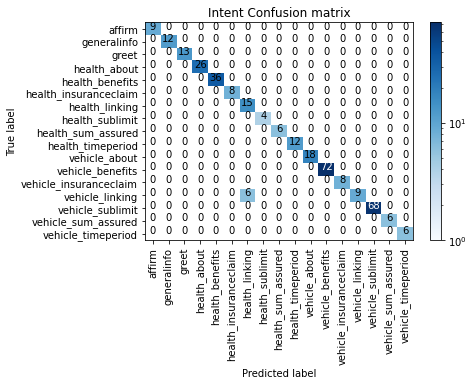

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9384483565848515
INFO:rasa_nlu.evaluate:Precision: 0.9385324471507343
INFO:rasa_nlu.evaluate:Accuracy:  0.9387474191328287
INFO:rasa_nlu.evaluate:Classification report: 
                  precision    recall  f1-score   support

        Benefits       0.94      1.00      0.97       180
        Coverage       1.00      1.00      1.00        72
     Credentials       1.00      0.92      0.96        12
       Documents       0.89      1.00      0.94        16
 HealthInsurance       0.92      0.96      0.94       275
    InsuranceSum       1.00      1.00      1.00        22
            Link       1.00      1.00      1.00        30
          Policy       1.00      0.90      0.95        10
           Renew       0.78      0.88      0.82        16
        SubLimit       1.00      1.00      1.00        16
      TimePeriod       1.00      1.00   

In [9]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu.md", model_directory)


In [10]:
stories_md = """

## path 0              
* greet
  - utter_greet             
* health_about{"HealthInsurance":"health insurance"}  
  - utter_action_health_about
* affirm  
  - utter_affirm
  
## path 1             
* greet
  - utter_greet             
* health_about{"HealthInsurance":"abc health insurance"}  
  - utter_action_health_about
* affirm  
  - utter_affirm  
  
  
## path 2           
* greet
  - utter_greet             
* vehicle_about{"VehicleInsurance":"vehicle insurance"}  
  - utter_action_vehicle_about
* affirm  
  - utter_affirm
  
## path 3           
* greet
  - utter_greet             
* vehicle_benefits{"Benefits":"benefits"}  
  - utter_action_vehicle_benefits
* affirm  
  - utter_affirm  
  
## path 4           
* greet
  - utter_greet             
* vehicle_benefits{ "Benefits":"tax benefits"}  
  - utter_action_vehicle_benefits
* affirm  
  - utter_affirm    
  
  
## path 5           
* greet
  - utter_greet             
* vehicle_benefits{ "Benefits":"regular benefits"}  
  - utter_action_vehicle_benefits
* affirm  
  - utter_affirm     
  
  
## path 6         
* greet
  - utter_greet             
* health_benefits{"Benefits":"benefits"}  
  - utter_action_health_benefits
* affirm  
  - utter_affirm  
    
## path 7        
* greet
  - utter_greet             
* health_benefits{ "Benefits":"regular benefits"}  
  - utter_action_health_benefits
* affirm  
  - utter_affirm 
  
## path 8      
* greet
  - utter_greet             
* health_benefits{ "Benefits":"complementary benefits"}  
  - utter_action_health_benefits
* affirm  
  - utter_affirm  
        
## path 9      
* greet
  - utter_greet             
* vehicle_timeperiod{ "TimePeriod":"timeperiod"}  
  - utter_action_vehicle_timeperiod
* affirm  
  - utter_affirm  
        
        
## path 10      
* greet
  - utter_greet             
* vehicle_timeperiod{ "TimePeriod":"long"}  
  - utter_action_vehicle_timeperiod
* affirm  
  - utter_affirm  
        
        
## path 11     
* greet
  - utter_greet             
* vehicle_timeperiod{ "TimePeriod":"duration"}  
  - utter_action_vehicle_timeperiod
* affirm  
  - utter_affirm  
        
        
## path 12     
* greet
  - utter_greet             
* vehicle_timeperiod{ "TimePeriod":"validity"}  
  - utter_action_vehicle_timeperiod
* affirm  
  - utter_affirm  

## path 13     
* greet
  - utter_greet             
* health_timeperiod{ "TimePeriod":"timeperiod"}  
  - utter_action_health_timeperiod
* affirm  
  - utter_affirm  
        
        
## path 14     
* greet
  - utter_greet             
* health_timeperiod{ "TimePeriod":"long"}  
  - utter_action_health_timeperiod
* affirm  
  - utter_affirm  
        
        
## path 15     
* greet
  - utter_greet             
* health_timeperiod{ "TimePeriod":"duration"}  
  - utter_action_health_timeperiod
* affirm  
  - utter_affirm  
        
        
## path 16     
* greet
  - utter_greet             
* health_timeperiod{ "TimePeriod":"validity"}  
  - utter_action_health_timeperiod
* affirm  
  - utter_affirm  
                 
        
## path 17    
* greet
  - utter_greet             
* health_insuranceclaim{ "Documents":"documents"}  
  - utter_action_health_document
* affirm  
  - utter_affirm  
        
        
## path 18    
* greet
  - utter_greet             
* health_insuranceclaim{ "Documents":"factors"}  
  - utter_action_health_document
* affirm  
  - utter_affirm  
                 
## path 19  
* greet
  - utter_greet             
* vehicle_insuranceclaim{ "Documents":"documents"}  
  - utter_action_health_document
* affirm  
  - utter_affirm  
        
        
## path 20     
* greet
  - utter_greet             
* vehicle_insuranceclaim{ "Documents":"factors"}  
  - utter_action_health_document
* affirm  
  - utter_affirm  
            
## path 21     
* greet
  - utter_greet             
* health_timeperiod{ "Link":"link"}  
  - utter_action_health_link
* affirm  
  - utter_affirm  
            
## path 22    
* greet
  - utter_greet             
* health_timeperiod{ "Link":"link"}  
  - utter_action_vehicle_link
* affirm  
  - utter_affirm  
            
## path 23   
* greet
  - utter_greet             
* generalinfo{ "Credentials":"password"}  
  - utter_action_credentials
* affirm  
  - utter_affirm  
            
            
## path 24  
* greet
  - utter_greet             
* generalinfo{ "Credentials":"username"}  
  - utter_action_credentials
* affirm  
  - utter_affirm  
            

            
## path 25  
* greet
  - utter_greet             
* generalinfo{ "Credentials":"login"}  
  - utter_action_credentials
* affirm  
  - utter_affirm  
            

            
## path 26
* greet
  - utter_greet             
* health_sum_assured{ "InsuranceSum":"amount"}  
  - utter_action_health_insurancesum
* affirm  
  - utter_affirm  

## path 27
* greet
  - utter_greet             
* health_sum_assured{ "InsuranceSum":"insurance sum"}  
  - utter_action_health_insurancesum
* affirm  
  - utter_affirm  
  

## path 28
* greet
  - utter_greet             
* health_sum_assured{ "InsuranceSum":"money"}  
  - utter_action_health_insurancesum
* affirm  
  - utter_affirm   
  

            
## path 29
* greet
  - utter_greet             
* vehicle_sum_assured{ "InsuranceSum":"amount"}  
  - utter_action_vehicle_insurancesum
* affirm  
  - utter_affirm  

## path 30
* greet
  - utter_greet             
* vehicle_sum_assured{ "InsuranceSum":"insurance sum"}  
  - utter_action_vehicle_insurancesum
* affirm  
  - utter_affirm  
  

## path 31
* greet
  - utter_greet             
* vehicle_sum_assured{ "InsuranceSum":"money"}  
  - utter_action_vehicle_insurancesum
* affirm  
  - utter_affirm    
  

## path 32
* greet
  - utter_greet             
* health_sublimit{ "SubLimit":"sub limit"}  
  - utter_action_health_sublimit
* affirm  
  - utter_affirm   
  
## path 33
* greet
  - utter_greet             
* vehicle_sublimit{ "SubLimit":"sub limit"}  
  - utter_action_vehicle_sublimit
* affirm  
  - utter_affirm 
  
## path 34
* greet
  - utter_greet             
* insurance_renewal{ "Renew":"renew"}  
  - utter_action_insurance_renew
* affirm  
  - utter_affirm  
  
## path 35
* greet
  - utter_greet             
* insurance_renewal{ "Renew":"renewing"}  
  - utter_action_insurance_renew
* affirm  
  - utter_affirm 
  
## path 36
* greet
  - utter_greet             
* insurance_renewal{ "Policy":"policy"}
  - utter_action_health_policy
* affirm  
  - utter_affirm     

## path 37
* greet
  - utter_greet             
* insurance_renewal{ "Policy":"insurance policy"}
  - utter_action_health_policy
* affirm  
  - utter_affirm   

  
## path 38
* greet
  - utter_greet             
* insurance_renewal{ "Policy":"policy"}
  - utter_action_vehicle_policy
* affirm  
  - utter_affirm     

## path 39
* greet
  - utter_greet             
* insurance_renewal{ "Policy":"insurance policy"}
  - utter_action_vehicle_policy
* affirm  
  - utter_affirm 
  

## path 40
* greet
  - utter_greet             
* health_coverage{ "Coverage":"coverage"}
  - utter_action_health_coverage
* affirm  
  - utter_affirm   

## path 41
* greet
  - utter_greet             
* health_coverage{ "Coverage":"insurance coverage"}
  - utter_action_health_coverage
* affirm  
  - utter_affirm   

## path 42
* greet
  - utter_greet             
* vehicle_coverage{ "Coverage":"coverage"}
  - utter_action_vehicle_coverage
* affirm  
  - utter_affirm   

## path 43
* greet
  - utter_greet             
* vehicle_coverage{ "Coverage":"insurance coverage"}
  - utter_action_vehicle_coverage
* affirm  
  - utter_affirm   
    
  
## path 1000  
* affirm
  - utter_affirm    
  
"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [11]:
domain_yml = """
intents:
- greet
- health_about
- vehicle_about
- vehicle_timeperiod
- health_timeperiod
- vehicle_benefits
- health_benefits
- affirm
- health_insuranceclaim
- vehicle_insuranceclaim
- generalinfo
- health_sum_assured
- vehicle_sum_assured
- health_sublimit
- vehicle_sublimit
- insurance_renewal
- health_coverage
- vehicle_coverage


slots:
  HealthInsurance:
    type: categorical
    values:
        - health insurance
        - abc health insurance
  VehicleInsurance:
    type: categorical
    values:
        - vehicle insurance
        - abc vehicle insurance         
  Benefits:
    type: categorical
    values:
        - benefits
        - tax benefits
        - regular benefits
        - complementary benefits
  TimePeriod:
    type: categorical
    values:
        - timeperiod
        - duration
        - long
        - validity
  Documents:
    type: categorical
    values:
        - documents
        - factors
  Link:
    type: categorical
    values:
        - link
  Credentials:
    type: categorical
    values:
        - password
        - username
        - login
 
  InsuranceSum:
    type: categorical
    values:
        - money
        - amount
        - insurance sum
  SubLimit:
    type: categorical
    values:
        - sub limit       
  Renew:
    type: categorical
    values:
        - renew
        - renewing 
  Policy:
    type: categorical
    values:
        - policy
        - insurance policy
  Coverage:
    type: categorical
    values:
        - coverage
        - insurance coverage        
entities:
- HealthInsurance
- VehicleInsurance
- Benefits
- TimePeriod
- Documents
- Link
- Credentials
- InsuranceSum
- SubLimit
- Renew
- Policy
- Coverage
actions:
- utter_greet
- utter_affirm
- utter_action_health_about
- utter_action_vehicle_about
- utter_action_vehicle_benefits
- utter_action_health_benefits
- utter_action_vehicle_timeperiod
- utter_action_health_timeperiod
- utter_action_health_document
- utter_action_vehicle_document
- utter_action_health_link
- utter_action_vehicle_link
- utter_action_credentials
- utter_action_health_insurancesum
- utter_action_vehicle_insurancesum
- utter_action_health_sublimit
- utter_action_vehicle_sublimit
- utter_action_insurance_renew
- utter_action_health_policy
- utter_action_vehicle_policy
- utter_action_health_coverage
- utter_action_vehicle_coverage
- action_default
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Welcome"
  utter_action_health_about:
  - text: "It is health insurance, which can be covered for all medical day-care treatments such as skin treatment and Lasik surgery. The policy covered for 5 yrs. The Free look period is 15 days, the grace period and waiting period is 30 days."
  utter_action_vehicle_about:
  - text: "It is vehicle insurance, which can be covered for all own damage treatments such as fire, theft, accident. The policy covered for 5 yrs. The Free look period is 15 days, the grace period and waiting period is 30 days."
  utter_action_vehicle_benefits:
  - text: "a. Renewal Benefits :rn i. Cumulative Bonus (Additional Sum Insured) - An Additional Sum Insured of 10% of Annual Sum Insured provided on each renewal for every claim-free year up to a maximum of 50%.rnii. Complimentary vehicle service Coupons: One coupon per individual policy and two coupons per Floater policy will be offered.rn b. Tax Benefits: Income tax exemption for 1 lakh rupees"
  utter_action_health_benefits:
  - text: "a. Renewal Benefits :i. a) Cumulative Bonus (Additional Sum Insured) - An Additional Sum Insured of 10% of Annual Sum Insured provided on each renewal for every claim-free year up to a maximum of 50% ii. b) Complementary Health Check-Up Coupons: One coupon per individual policy and two coupons per Floater policy will be offered. b. Tax Benefits: Income tax exemption for 1 lakh rupees "
  utter_action_vehicle_timeperiod:
  - text: "The policy covered for 5 yrs. The Free look period is 15 days, the grace period and waiting period is 30 days."
  utter_action_health_timeperiod:
  - text: "The policy covered for 5 yrs. The Free look period is 15 days, the grace period and waiting period is 30 days."
  utter_action_health_document:
  - text: "a. Medical bills b. Policy copy"
  utter_action_vehicle_document:
  - text: "a. Driving License copy. b. Original FIR copy c. RC copy of the vehicle with all original keys."  
  action_default:
  - text: "Default"
  utter_action_health_link:
  - text: "https://www.abc.com/health"  
  utter_action_vehicle_link:
  - text: "https://www.abc.com/vehicle"
  utter_action_credentials:
  - text: "https://www.abc.com/vehicle/passwordreset"
  utter_action_health_insurancesum:
  - text: "Test Health Insurance Sum"
  utter_action_vehicle_insurancesum:
  - text: "Test Vehicle Insurance Sum"
  utter_action_health_sublimit:
  - text: "Test Health Sub Limit"  
  utter_action_vehicle_sublimit: 
  - text: "Test Vehicle Sub Limit"
  utter_action_insurance_renew:
  - text: "Test Insurance Revenue"
  utter_action_health_coverage:
  - text: "Test health Coverage"  
  utter_action_vehicle_coverage:
  - text: "Test vehicle coverage"  
  utter_action_health_policy:
  - text: "Test Health Policy"  
  utter_action_vehicle_policy:
  - text: "Test Vehicle Policy"    
  utter_affirm:
  - text: "You're welcome"
  
  
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


In [12]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

import requests

class ApiAction(Action):
    def name(self):
        return "action_get_help"

    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('HealthInsurance','HealthInsurance','VehicleInsurace')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["',"")
        response = response.replace('"]',"")

#from IPython.display import Image
from rasa_core.agent import Agent
  

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=10)
Image(filename="story_graph.png")

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 45/45 [00:00<00:00, 306.07it/s, # trackers=1]


AttributeError: ignored

In [0]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


fallback = FallbackPolicy(fallback_action_name="action_default",
                          core_threshold=0.3,
                          nlu_threshold=0.3)
agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5)])


training_data = agent.load_data('stories.md',augmentation_factor=0)

agent.train(
    training_data,
    validation_split=0.1,
    epochs=50
)

agent.persist('models/dialogue')

In [0]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

In [0]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5)])


training_data = agent.load_data('stories.md',augmentation_factor=0)

agent.train(
    training_data,
    validation_split=0.1,
    epochs=50
)
agent.persist('models/dialogue')

In [0]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5)])


training_data = agent.load_data('stories.md',augmentation_factor=0)

agent.train(
    training_data,
    validation_split=0.2,
    epochs=200
)
agent.persist('models/dialogue')


In [0]:
def getReply(msg_user):


  from rasa_core.agent import Agent
  agent1 = Agent.load('models/dialogue', interpreter=model_directory)
  print("Your bot is ready to talk! Start to say 'hello' or say 'stop' to finish or restart your dialogue")


  from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
  from rasa_core.agent import Agent

  i=0
  msgs=""
  invalidcntr=0
  while True:
      #msg_user=input()
      if(i==0):
        a="hello"
      else:
        a = msg_user
      pprint(interpreter.parse(a))
      if(i>4):
        break;
 
     
      responses = agent1.handle_message(a)
          
      for response in responses:
            print("=============="+response["text"])
            if(a=="start"):
                #msgs=response["text"]
                break;
            else:
              if(response["text"]!="Welcome"):
                msgs=msgs+str("<br/>")+response["text"]
      #if a == 'stop':
         # break         
              
     # if(invalidcntr==0 and i==0):
      #  msgs="Unable to understand the query.try something else."
        
      i+=1
  return msgs           
            

In [0]:
from IPython.display import clear_output

import mysql.connector
from mysql.connector.constants import ClientFlag

config = {
    'user': '###',
    'password': '####',
    'host': '#####',
}
clear_output()
cnx = mysql.connector.connect(**config)
cur = cnx.cursor(buffered=True)
msg_txt=""
while True:
  cur.execute("select chat_id,lower(chat_msg) from mrdevuj6_devathon.chats where cstatus='P' limit 1;")
  rrow=cur.fetchone()
  if(rrow):
    msg_txt=rrow[1]
    print(msg_txt)
    rply=getReply(msg_txt)
    if(rply=="" and msg_txt!="stop"):
      rply="Cannot understand the query. Try something else."
    if(msg_txt=="stop"):
      "Bye. Thank you for your time. Please feel free to come back any time.";
      
    if(msg_txt=="start"):
      rply="Hello, welcome to ABC Insurance Virtual Assistant. How can I assist you today?";
    qry="update mrdevuj6_devathon.chats set chat_reply='"+str(rply)+"',cstatus='C' where  chat_id="+str(rrow[0])+";"
    #print(qry)
    cur.execute(qry)
    print(rply)
  if(msg_txt=="stop"):
    break;
      
   
#print(cur.fetchone())
cur.close()
cnx.close()